# Simple Neural Network for MNIST Image classification task
2019.01.12

![](http://cdn-ak.f.st-hatena.com/images/fotolife/T/TJO/20150225/20150225130052.png)

## まとめ
1. Preprocess Data
2. Build and Compile A Model
3. Reshape and Scaling Features Data
4. Reshape and Encode Target Data
5. Fit Training and Validation Data to Model
6. Evaluate Model

## 1. Import Data

In [45]:
import keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [46]:
# 28 * 28 pixel が 6万枚
train_images.shape

(60000, 28, 28)

In [47]:
train_labels.shape

(60000,)

In [48]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [49]:
type(train_images)

numpy.ndarray

In [50]:
test_images.shape

(10000, 28, 28)

In [51]:
len(test_labels)

10000

In [52]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## 2. Build A Model

1. Build NN Architecture
2. Feed Traing Data to NN
3. Test it!


In [53]:
from keras.models import Sequential
from keras.layers import Dense
# ２層からなるNN
network = Sequential()
network.add(Dense(512, activation="relu", input_shape=(28*28, ))) # input layer
network.add(Dense(10, activation="softmax")) # output layer
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


  
![](https://www.researchgate.net/profile/Amparo_Alonso-Betanzos/publication/221165717/figure/fig1/AS:669398947885077@1536608554614/Two-layer-neural-network-and-scheme-of-the-proposed-hybrid-method.png)
  
#### Compiling Model

1. A loss function
2. An optimizer
3. Metrics to monitor during training and testing

In [54]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## 3. Reshaping Data

- Previous Data Shape: `(60000, 28, 28)` & `uint8`
- Converted Shape: `(60000, 28 * 28)` & `float32`
   



In [55]:
# 3Dだった
print(train_images.shape, train_images.dtype)

(60000, 28, 28) uint8


In [56]:
# 2Dにする
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')
print(train_images.shape, train_images.dtype)

(60000, 784) float32


In [57]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32')
print(test_images.shape, test_images.dtype)

(10000, 784) float32


## 4. Scaling Values 
- Previous Value Range: `[0, 255]`
- Scaled Value Range: `[0, 1]` 

In [58]:
# range
print(train_images.min(), train_images.max())
print(test_images.min(), test_images.max())

0.0 255.0
0.0 255.0


In [59]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## 5. Reshape and Label Encoding for Target Value
- OneHotなエンコーディングをする

In [60]:
print(train_labels.shape)
print(train_labels)

(60000,)
[5 0 4 ... 5 6 8]


In [62]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
print(train_labels.shape)
print("---------------")
print(train_labels)

(60000, 10)
---------------
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [61]:
test_labels = to_categorical(test_labels)
print(test_labels.shape)
print("---------------")
print(test_labels)

(10000, 10)
---------------
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 6. Fittig Training data to Model

In [63]:
network.fit(x=train_images, y=train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 13s 211us/step - loss: 0.2574 - acc: 0.9256
Epoch 2/5
60000/60000 [==============================] - 11s 175us/step - loss: 0.1041 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 9s 152us/step - loss: 0.0692 - acc: 0.9789
Epoch 4/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.0500 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 9s 142us/step - loss: 0.0376 - acc: 0.9891


In [68]:
history = network.fit(x=train_images, y=train_labels, epochs=10, batch_size=64)
print(history.history.keys())

Epoch 1/10
60000/60000 [==============================] - 15s 250us/step - loss: 0.0042 - acc: 0.9988
Epoch 2/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0037 - acc: 0.9989
Epoch 3/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.0027 - acc: 0.9993
Epoch 4/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.0028 - acc: 0.9992
Epoch 5/10
60000/60000 [==============================] - 15s 254us/step - loss: 0.0024 - acc: 0.9994
Epoch 6/10
60000/60000 [==============================] - 14s 232us/step - loss: 0.0020 - acc: 0.9994
Epoch 7/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.0016 - acc: 0.9995
Epoch 8/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.0013 - acc: 0.9997
Epoch 9/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.0011 - acc: 0.9997
Epoch 10/10
60000/60000 [==============================] - 13s 221us/step - loss: 

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

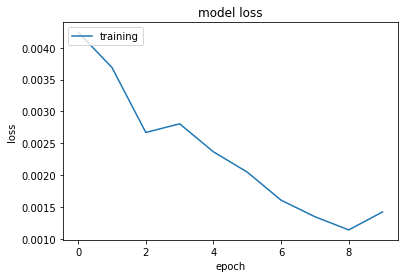

In [70]:
# summarize history for loss
#  loss='categorical_crossentropy',
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'], loc='upper left')
plt.show()

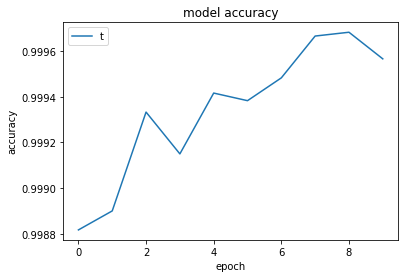

In [71]:
# summarize history for accuracy
# metrics=['accuracy']
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('training', loc='upper left')
plt.show()

## Evaluation Trained Model

In [73]:
network.evaluate(x=train_images, y=train_labels)

60000/60000 [==============================] - 8s 136us/step


[0.000852029341525349, 0.9998166666666667]

In [72]:
network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 170us/step


[0.10871661433029976, 0.9827]

Good Accuracy!

In [74]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 123us/step


In [75]:
print("test_acc:", test_acc)

test_acc: 0.9827


In [76]:
print("test_loss: ", test_loss)

test_loss:  0.10871661433029976
